# Ajuste de Oultiers
El presente notebook presenta un algoritmo para suavizar outliers en series temporales de variables ambientales. Se trabaja con los valores obtenidos por una red inalámbrica de sensores desplegada en un cultivo de cacao en una vereda del municipio de San Cayetano, Norte de Santander. Las mediciones analizadas corresponden a las variables Temperatura, Humedad Relativa, Humedad de la Tierra e Intensidad Lumínica.

### Importa los módulos necesarios y establece configuraciones

In [1]:
# Se importan los módulos necesarios
import pandas as pd
import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
import funs
from scipy.stats.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')
# Se define un límite para las filas de los dataframes que se presenten en el notebook
pd.options.display.max_rows = 10

C:\Users\Jergb\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [2]:
# Se importan los registros de los nodos para el periodo indicado
nodo = 2
periodo = 2
nodosp={}
for i in [2,3,5]:
    nodosp[i] = pd.read_csv('nodo%d_periodo%d.csv'%(i,periodo),
                                           parse_dates=True,index_col=0)
    nodosp[i] = nodosp[i].drop(columns=['HORA'])

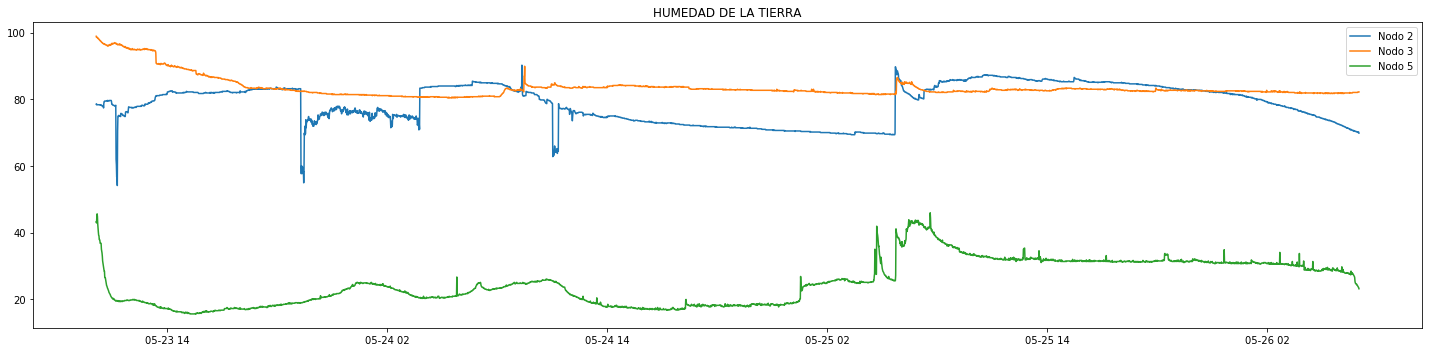

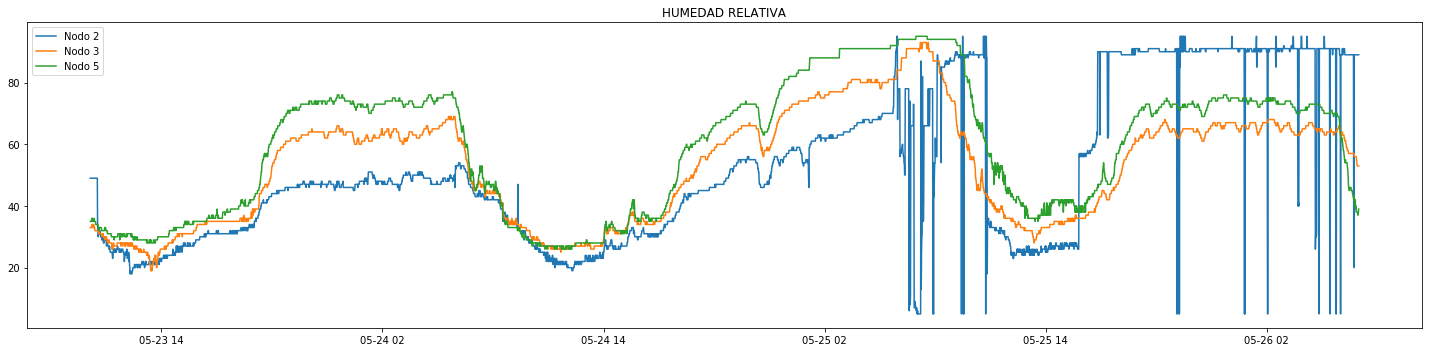

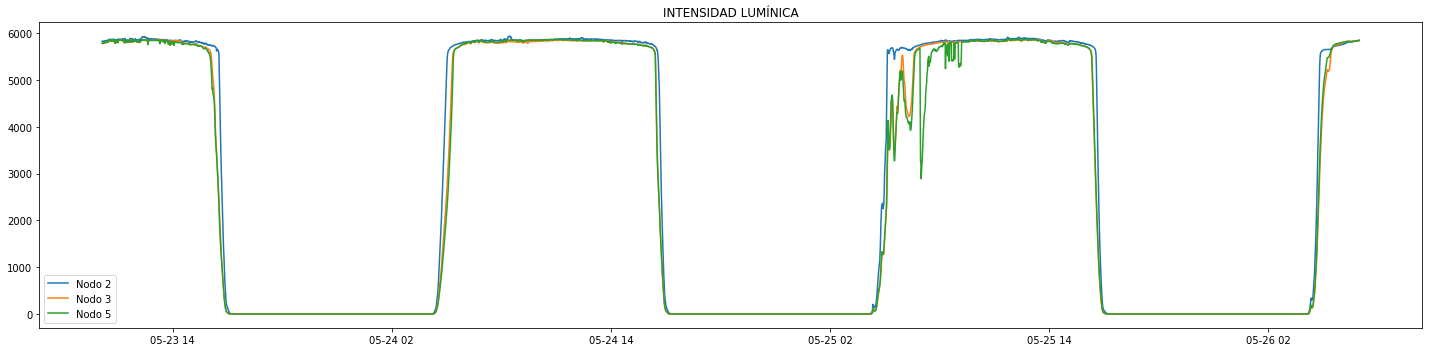

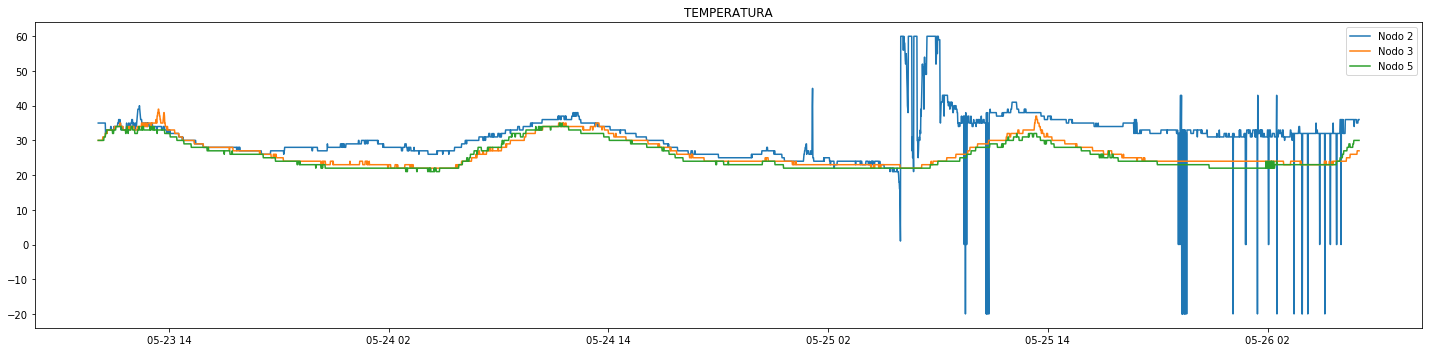

In [3]:
# Grafica las variables  de interes
for i in range(4):
    plt.figure(figsize=[20,5])
    sub=510
    for n in nodosp:
        sub+=1
        plt.plot(nodosp[n].iloc[:,i],label='Nodo %d'%n)
        plt.title(nodosp[n].columns[i])
        plt.legend()
        plt.tight_layout()

In [4]:
raw = nodosp[2]
# Crea dos copias de los datos, filtrado para realzar un filtro de valores atípicos
# según el rango de medición y ajustado para suavizar la curva 
funs.raw = raw.copy()
funs.filtrado = raw.copy()
funs.filtrar = raw.copy()
funs.ajustado = raw.copy()

### Grafica las variables temperatura y humedad de la tierra, el gráfico de dispersión de las dos variables y presenta la correlación de Pearson

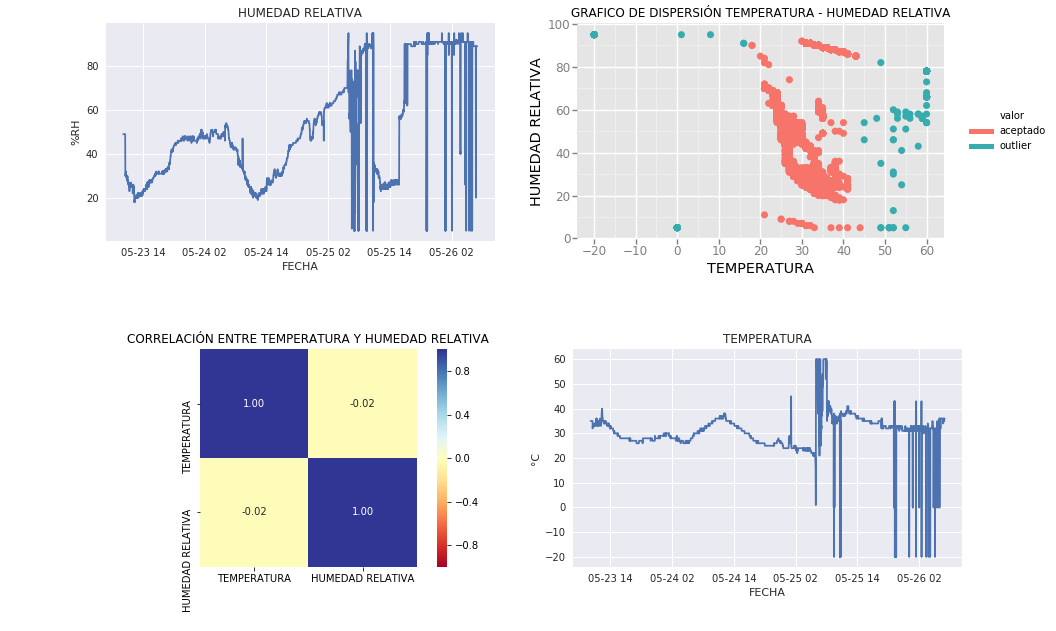

In [5]:
funs.info_relation(raw,'TEMPERATURA','HUMEDAD RELATIVA')

### Aplica un filtro de rango para los valores, basado en el criterio de Tukey y el rango de medición de los sensores

El sensor DHT11 tiene rangos de medición de:  
- Temperatura de $(0°C - 50°C)\pm5°C$  
- Humedad Relativa de $(20\% - 90\%)\pm2\%$

0 53


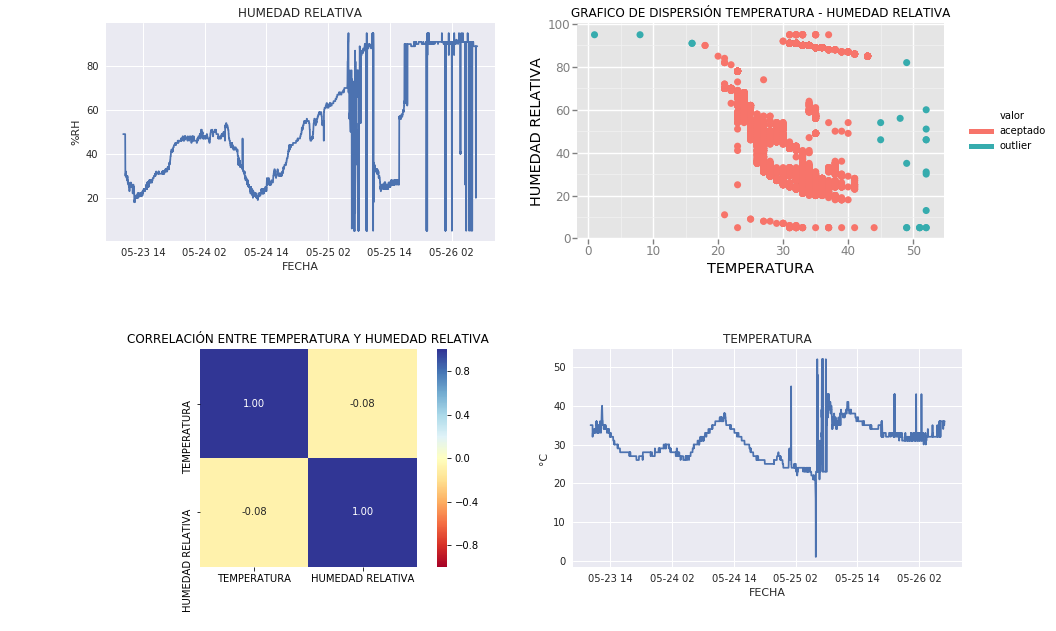

In [6]:
var1='TEMPERATURA'
var2='HUMEDAD RELATIVA'
lim_menor = funs.filtro_menor(var1,var2, -5, 55, -1)
lim_mayor = funs.filtro_mayor(var1,var2,-5, 55, -1)
print(lim_menor,lim_mayor)
funs.info_var(0)
funs.filtrar_variables(var1,lim_menor,lim_mayor)
funs.info_relation(funs.filtrado,var1,var2)

12 96


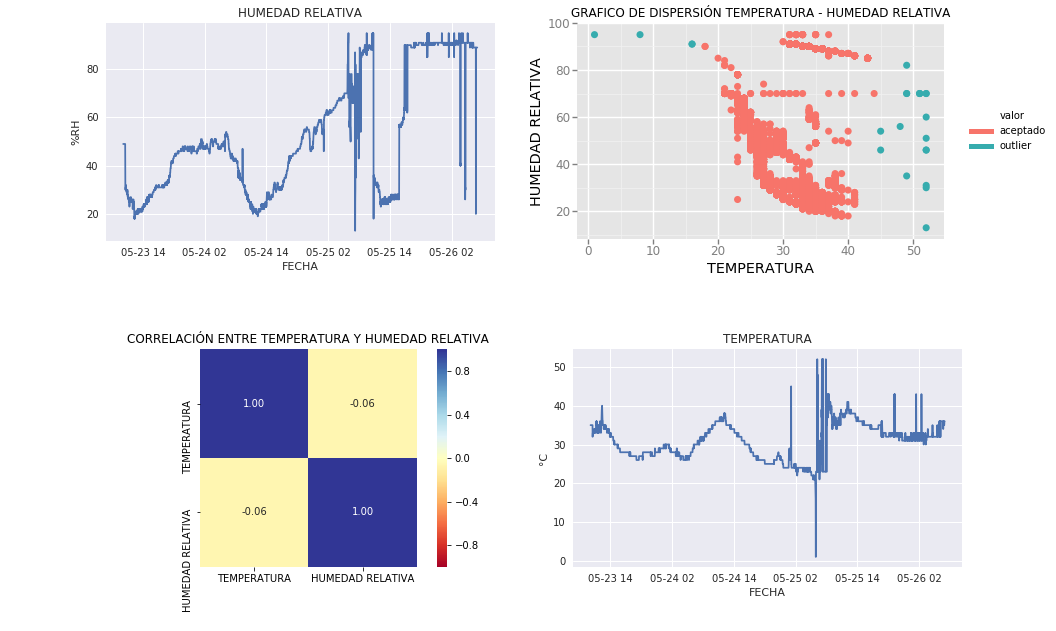

In [90]:
var2= 'TEMPERATURA'
var1= 'HUMEDAD RELATIVA'
lim_menor = funs.filtro_menor(var1,var2, 15, 90, -1)
lim_mayor = funs.filtro_mayor(var1,var2,15, 90, -1)
print(lim_menor,lim_mayor)
funs.filtrar_variables(var1,lim_menor,lim_mayor)
funs.info_relation(funs.filtrado,var2,var1)

54 98


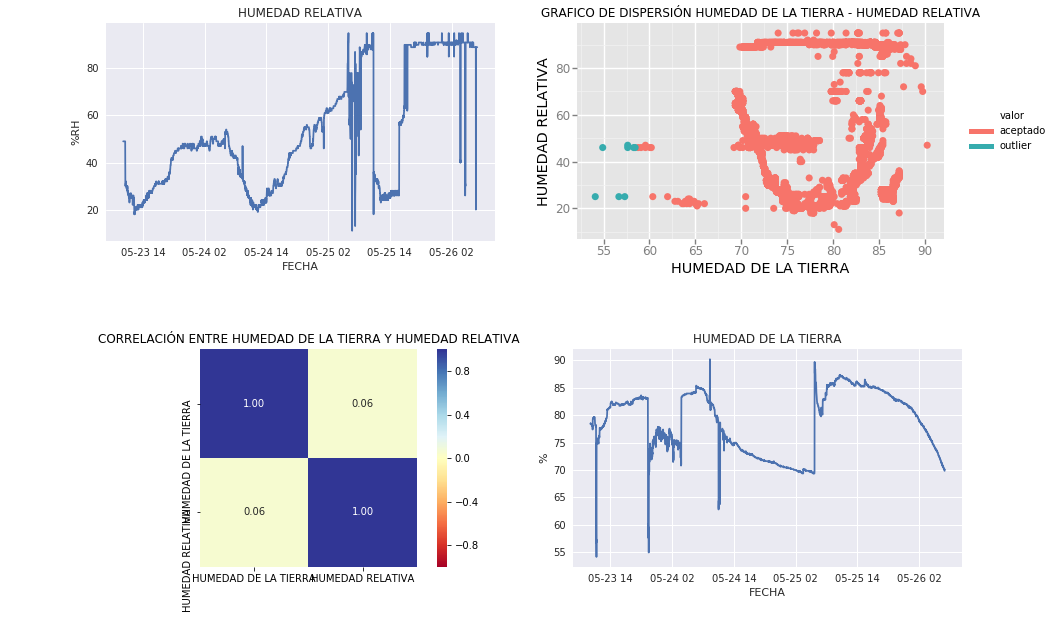

In [8]:
var1= 'HUMEDAD DE LA TIERRA'
var2= 'HUMEDAD RELATIVA'
lim_menor = funs.filtro_menor(var1,var2, 10, 100, 1)
lim_mayor = funs.filtro_mayor(var1,var2,10, 100, 1)
print(lim_menor,lim_mayor)
funs.filtrar_variables(var1,lim_menor,lim_mayor)
funs.info_relation(funs.filtrado,var1,var2)

lim_menor3 = funs.filtro_menor(3,0,0,100,1)
print(lim_menor1)
funs.filtro_var(0,lim_menor0,lim_mayor0)
lim_mayor3 = funs.filtro_mayor(3,0,0,100,1)
print(lim_mayor1)

funs.filtro_var(3,lim_menor3,lim_mayor3)

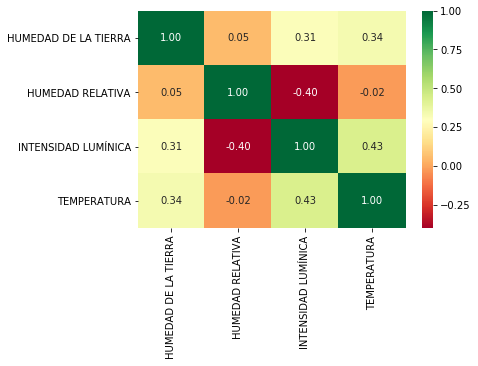

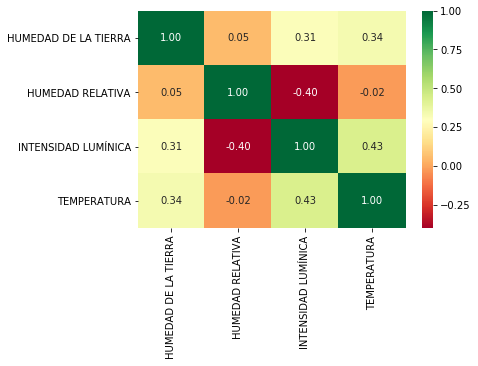

In [9]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.figure()
sns.heatmap(funs.filtrar.corr(), annot=True, cmap='RdYlGn',fmt=".2f")

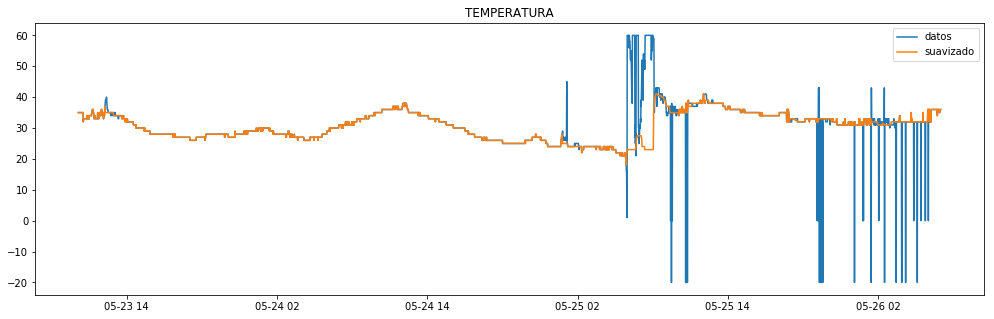

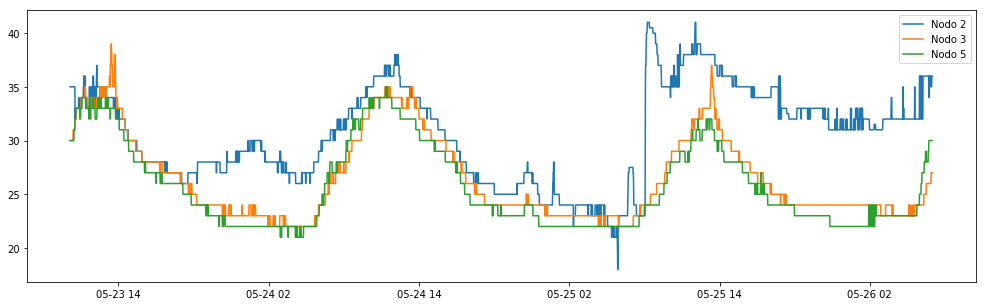

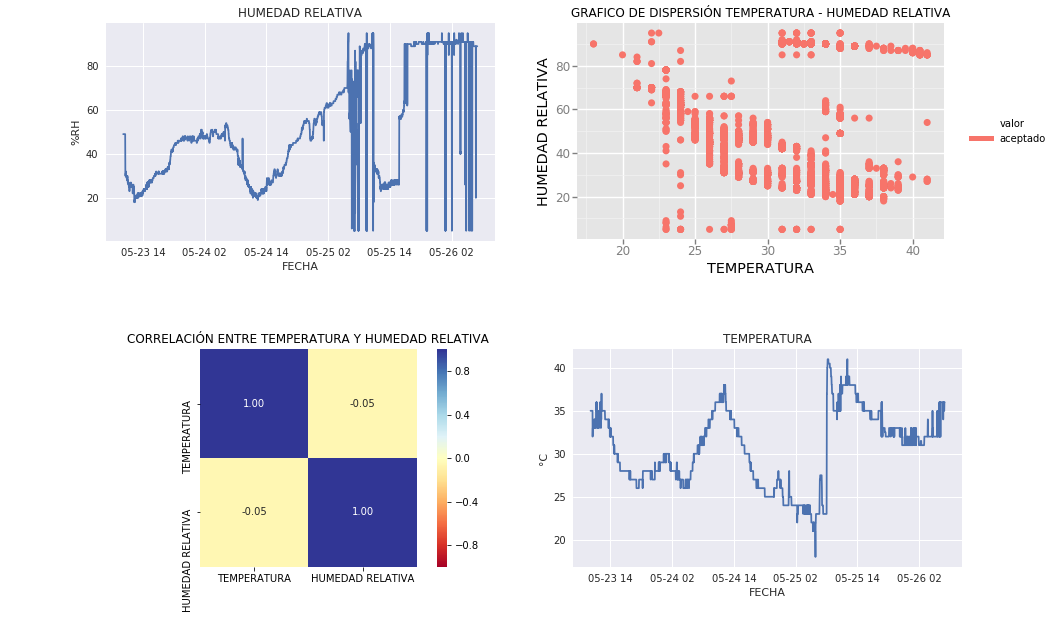

In [10]:
funs.ajuste_variacion('TEMPERATURA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,3],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,3],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,3],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

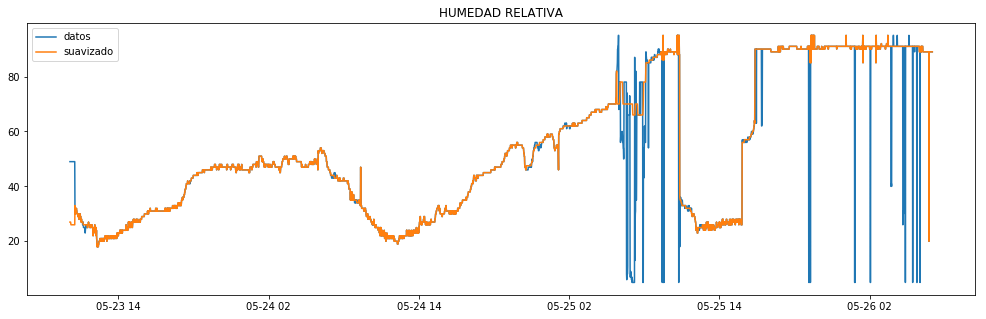

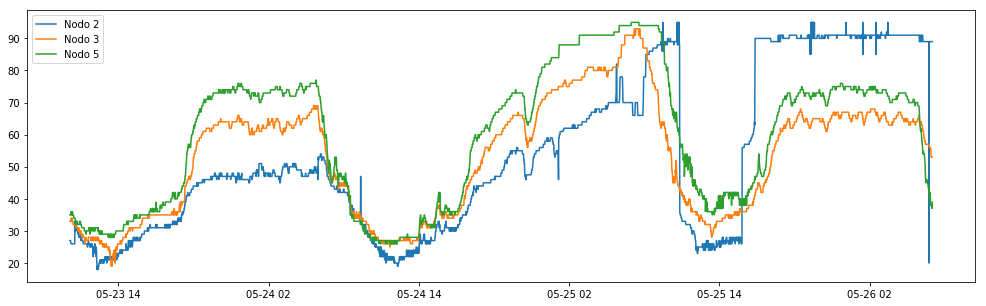

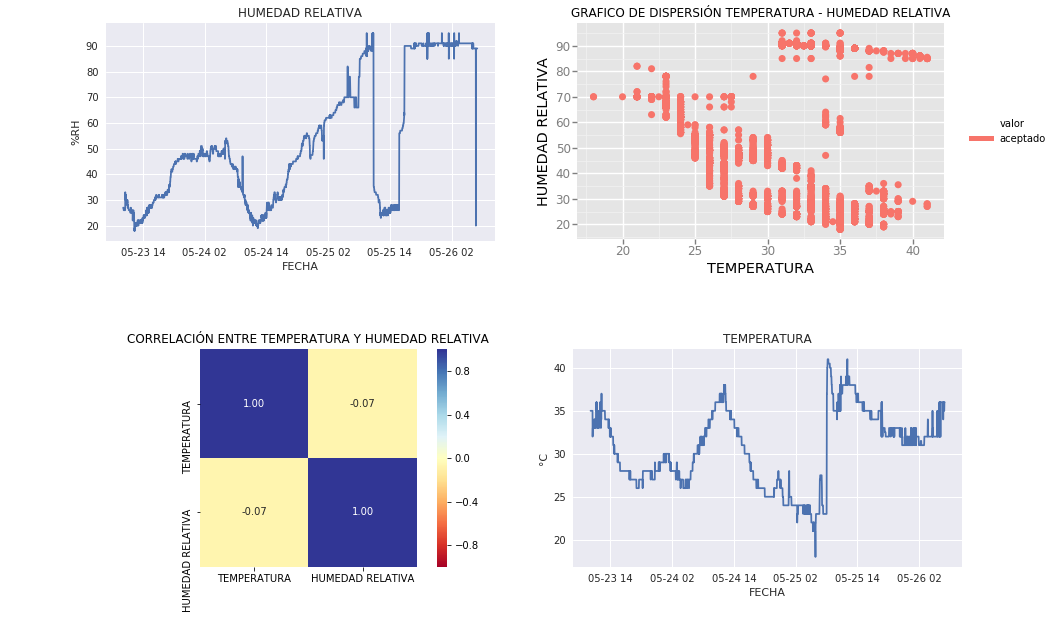

In [11]:
funs.ajuste_variacion('HUMEDAD RELATIVA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,1],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,1],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,1],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'TEMPERATURA','HUMEDAD RELATIVA')

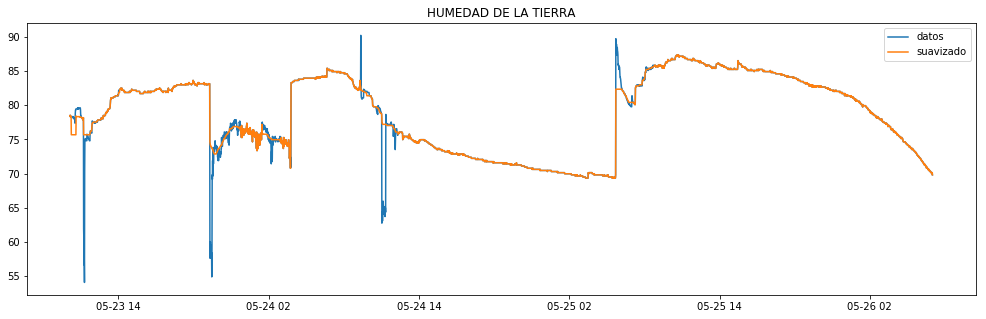

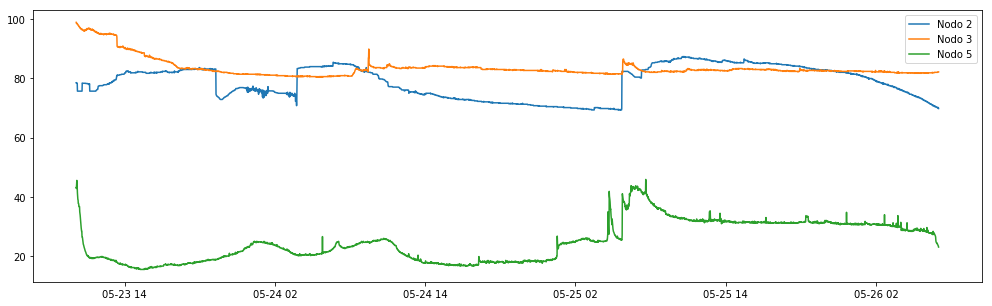

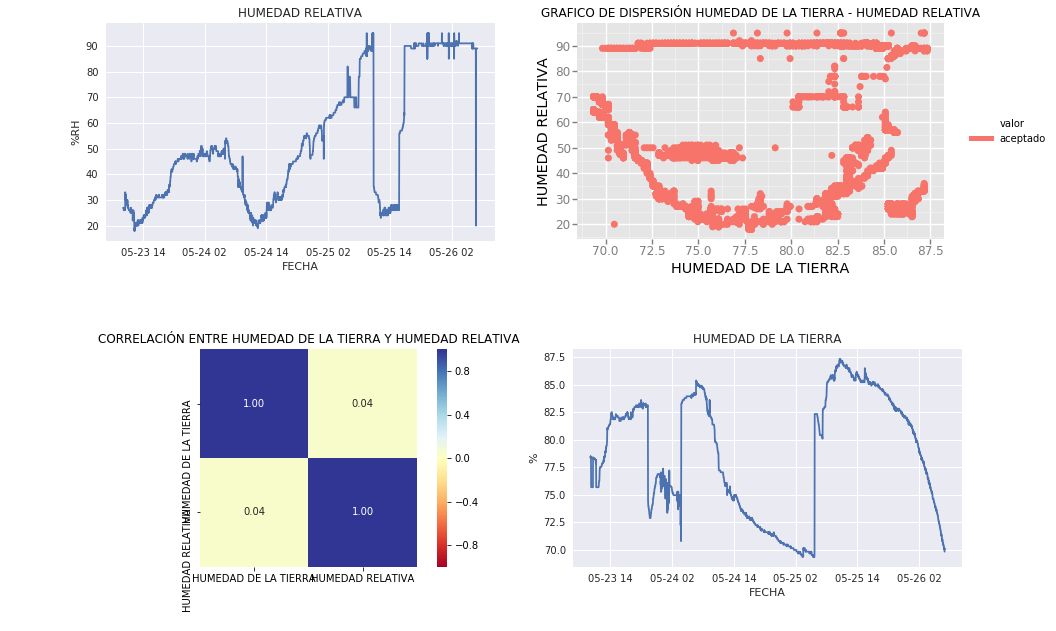

In [12]:
funs.ajuste_variacion('HUMEDAD DE LA TIERRA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,0],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,0],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,0],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'HUMEDAD DE LA TIERRA','HUMEDAD RELATIVA')

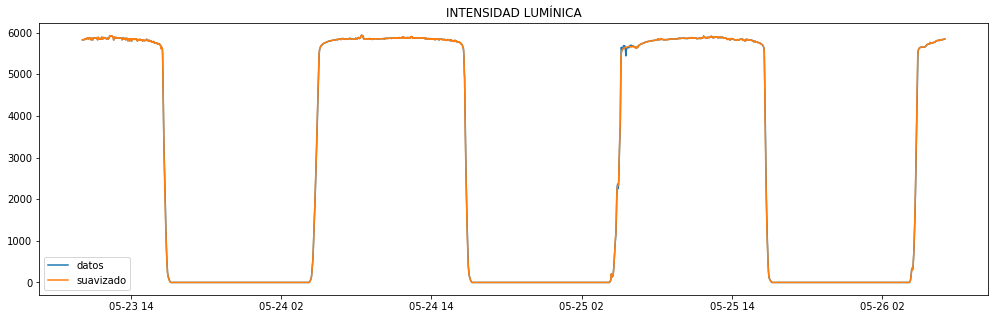

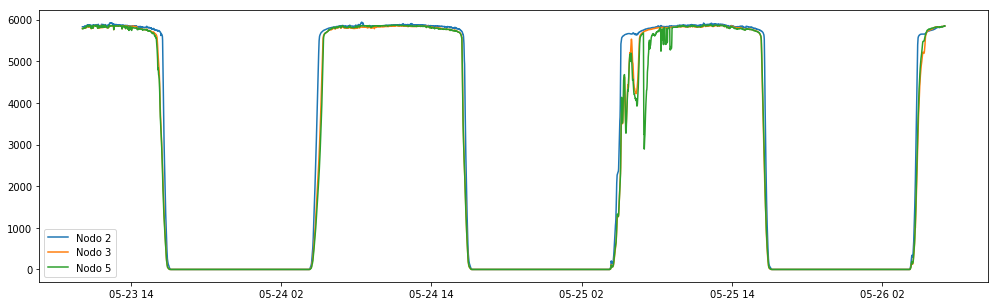

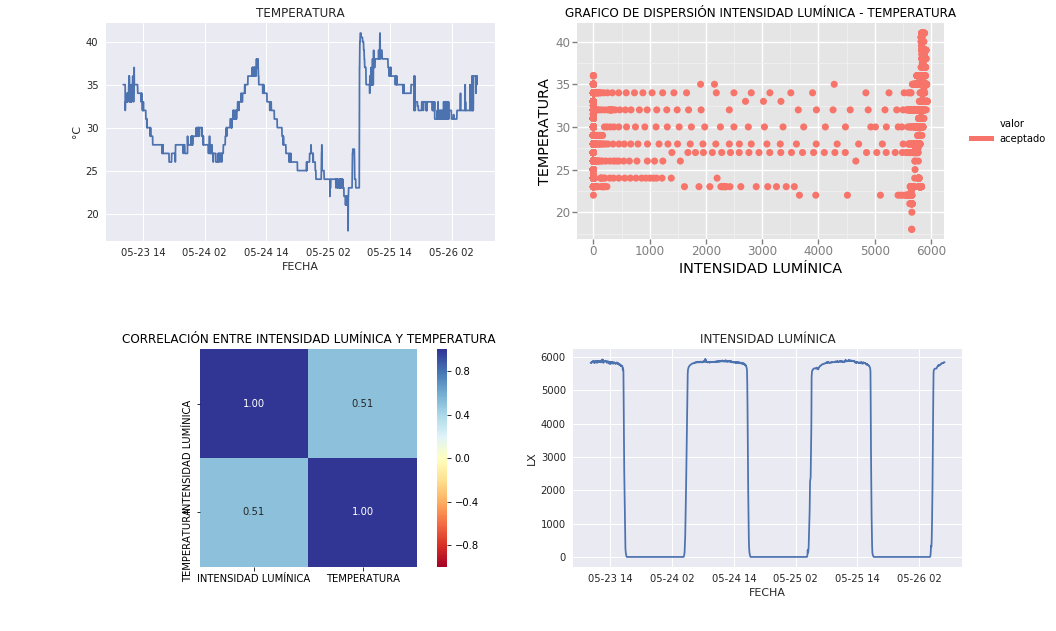

In [13]:
funs.ajuste_variacion('INTENSIDAD LUMÍNICA')
plt.figure(figsize=[17,5])
plt.plot(funs.ajustado.iloc[:,2],label='Nodo 2')
plt.plot(nodosp[3].iloc[:,2],label='Nodo 3')
plt.plot(nodosp[5].iloc[:,2],label='Nodo 5')
plt.legend()
plt.show()
plt.figure()
funs.info_relation(funs.ajustado,'INTENSIDAD LUMÍNICA','TEMPERATURA')

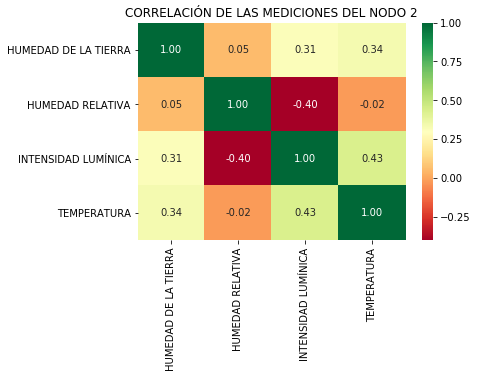

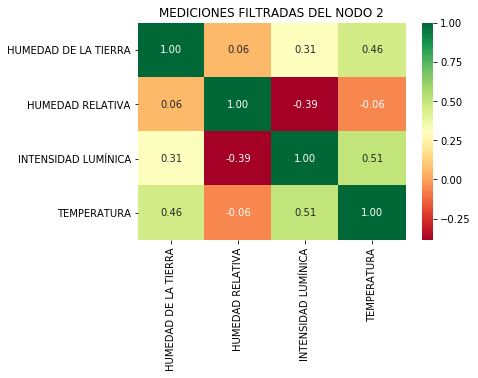

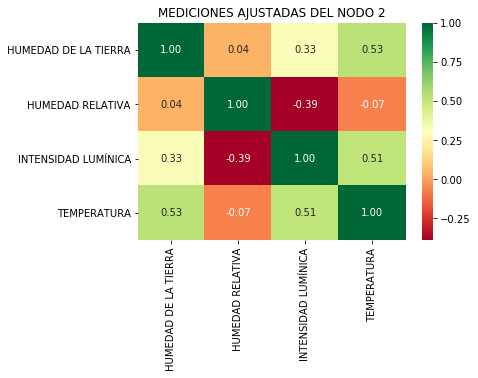

In [14]:
sns.heatmap(raw.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('CORRELACIÓN DE LAS MEDICIONES DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.filtrado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES FILTRADAS DEL NODO %s' %nodo)
plt.figure()
sns.heatmap(funs.ajustado.corr(), annot=True, cmap='RdYlGn',fmt=".2f")
plt.title('MEDICIONES AJUSTADAS DEL NODO %s' %nodo)
plt.show()